___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [78]:
df0 = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\PROJECTS\CustomerSegmentation\marketing_campaign.csv", sep=';')

In [79]:
df = df0.copy() 

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [80]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [81]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [82]:
from skimpy import clean_columns
clean_column_df = clean_columns(df, case='snake')
df.columns = clean_column_df.columns.tolist()
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_1',
       'accepted_cmp_2', 'complain', 'z_cost_contact', 'z_revenue',
       'response'],
      dtype='object')

In [83]:
#y = df.response
#df.drop("response", axis=1, inplace=True)

In [84]:
df.rename(columns={'mnt_wines': 'wines', 'mnt_fruits': 'fruits', 'mnt_meat_products': 'meats', 'mnt_fish_products': 'fishes', 'mnt_sweet_products': 'sweets', 'mnt_gold_prods': 'golds'}, inplace=True)

In [85]:
df.rename(columns={'num_catalog_purchases': 'catalog', 'num_store_purchases': 'store', 'num_web_purchases': 'web', 'num_deals_purchases': 'deal', 'num_web_visits_month': 'web_visits'}, inplace=True)

In [86]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'wines', 'fruits', 'meats',
       'fishes', 'sweets', 'golds', 'deal', 'web', 'catalog', 'store',
       'web_visits', 'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5',
       'accepted_cmp_1', 'accepted_cmp_2', 'complain', 'z_cost_contact',
       'z_revenue', 'response'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

In [87]:
df.shape

(2240, 29)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2240 non-null   int64  
 1   year_birth      2240 non-null   int64  
 2   education       2240 non-null   object 
 3   marital_status  2240 non-null   object 
 4   income          2216 non-null   float64
 5   kidhome         2240 non-null   int64  
 6   teenhome        2240 non-null   int64  
 7   dt_customer     2240 non-null   object 
 8   recency         2240 non-null   int64  
 9   wines           2240 non-null   int64  
 10  fruits          2240 non-null   int64  
 11  meats           2240 non-null   int64  
 12  fishes          2240 non-null   int64  
 13  sweets          2240 non-null   int64  
 14  golds           2240 non-null   int64  
 15  deal            2240 non-null   int64  
 16  web             2240 non-null   int64  
 17  catalog         2240 non-null   i

In [89]:
df.isnull().sum()

id                 0
year_birth         0
education          0
marital_status     0
income            24
kidhome            0
teenhome           0
dt_customer        0
recency            0
wines              0
fruits             0
meats              0
fishes             0
sweets             0
golds              0
deal               0
web                0
catalog            0
store              0
web_visits         0
accepted_cmp_3     0
accepted_cmp_4     0
accepted_cmp_5     0
accepted_cmp_1     0
accepted_cmp_2     0
complain           0
z_cost_contact     0
z_revenue          0
response           0
dtype: int64

In [90]:
# We will remove the NA values
df.dropna(inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2216 non-null   int64  
 1   year_birth      2216 non-null   int64  
 2   education       2216 non-null   object 
 3   marital_status  2216 non-null   object 
 4   income          2216 non-null   float64
 5   kidhome         2216 non-null   int64  
 6   teenhome        2216 non-null   int64  
 7   dt_customer     2216 non-null   object 
 8   recency         2216 non-null   int64  
 9   wines           2216 non-null   int64  
 10  fruits          2216 non-null   int64  
 11  meats           2216 non-null   int64  
 12  fishes          2216 non-null   int64  
 13  sweets          2216 non-null   int64  
 14  golds           2216 non-null   int64  
 15  deal            2216 non-null   int64  
 16  web             2216 non-null   int64  
 17  catalog         2216 non-null   int64 

In [92]:
df.select_dtypes(include=['object'])

,education,marital_status,dt_customer
0,Graduation,Single,2012-09-04
1,Graduation,Single,2014-03-08
2,Graduation,Together,2013-08-21
3,Graduation,Together,2014-02-10
4,PhD,Married,2014-01-19
...,...,...,...
2235,Graduation,Married,2013-06-13
2236,PhD,Together,2014-06-10
2237,Graduation,Divorced,2014-01-25
2238,Master,Together,2014-01-24


In [93]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%Y-%m-%d')

In [94]:
df['dt_customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2216, dtype: datetime64[ns]

In [95]:
df["loyalty"] = df['dt_customer'].max()-df["dt_customer"]

In [96]:
# alternative method:          df['loyalty']  = df["loyalty"].astype("str").str.extract('(\d+)').astype(int)
df['loyalty'] = pd.to_numeric(df['loyalty'].dt.days, downcast='integer')

In [97]:
df['loyalty'] 

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: loyalty, Length: 2216, dtype: int16

In [98]:
df["age"] = 2014-df["year_birth"]
df["age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2216, dtype: int64

In [99]:
df.education.value_counts()

education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [100]:
df.education = df.education.map({"Graduation":"1", "Basic":"0", "PhD":"2","Master":"2","2n Cycle":"2"}).astype(int)

In [101]:
df.education

0       1
1       1
2       1
3       1
4       2
       ..
2235    1
2236    2
2237    1
2238    2
2239    2
Name: education, Length: 2216, dtype: int32

In [102]:
df.education.value_counts()

education
1    1116
2    1046
0      54
Name: count, dtype: int64

In [103]:
df["marital_status"].value_counts()

marital_status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [104]:
df["living_with"] = df["marital_status"].map({"Married":2, "Together":2, "Single":1,"Divorced":1,"Widow":1, "Alone":1, "Absurd":1, "YOLO":1}) 

In [105]:
df["living_with"].value_counts()

living_with
2    1430
1     786
Name: count, dtype: int64

In [106]:
df["children"]=df["kidhome"]+df["teenhome"]
df["children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: children, Length: 2216, dtype: int64

In [107]:
df["family_size"] = df["living_with"] + df["children"]

In [108]:
df["family_size"].value_counts()

family_size
3    880
2    757
4    296
1    252
5     31
Name: count, dtype: int64

In [109]:
df["spent"] = df["wines"]+ df["fruits"]+ df["meats"]+ df["fishes"]+ df["sweets"]+ df["golds"]

In [110]:
df["spent"].value_counts()

spent
22      18
46      18
57      16
55      15
44      15
        ..
108      1
1493     1
936      1
528      1
843      1
Name: count, Length: 1047, dtype: int64

In [111]:
df.complain.value_counts()

complain
0    2195
1      21
Name: count, dtype: int64

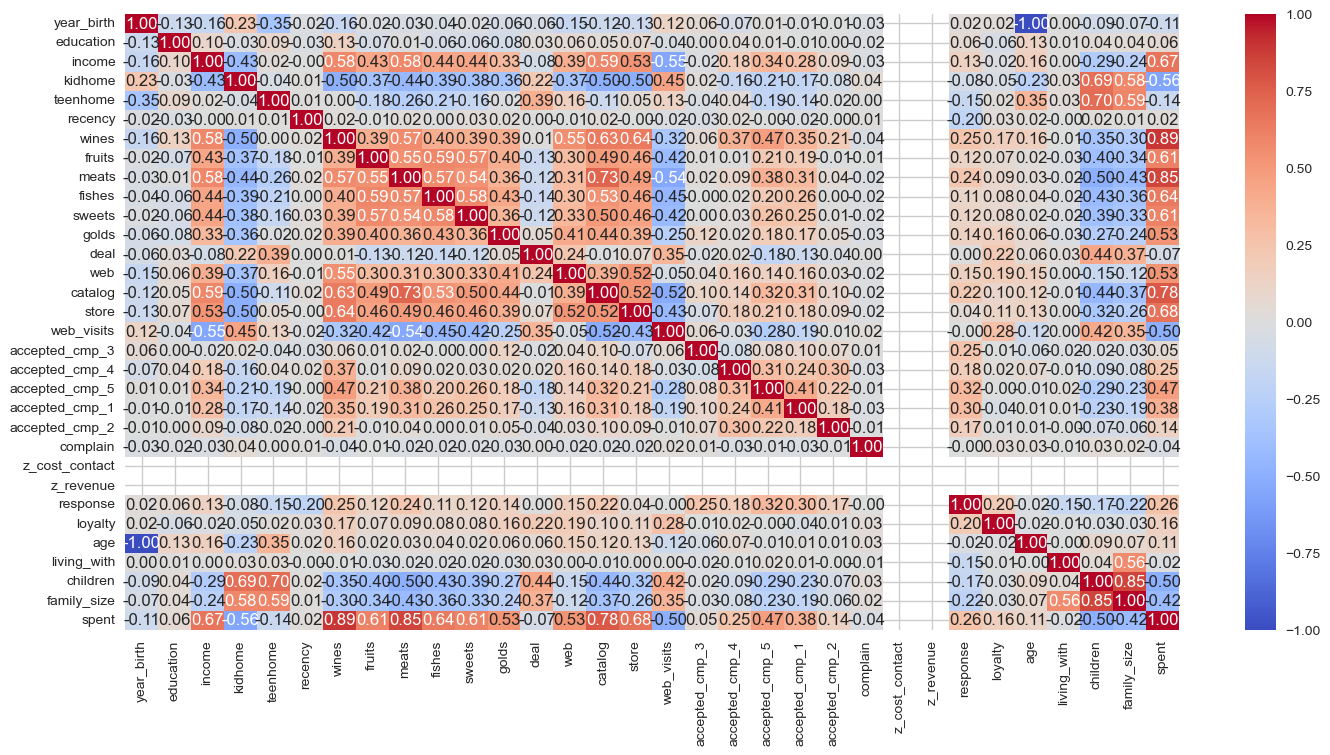

In [112]:
plt.figure(figsize=(17, 8))
sns.heatmap(
    df.iloc[:, 1:].corr(numeric_only=True),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    fmt=".2f",
)
plt.show()

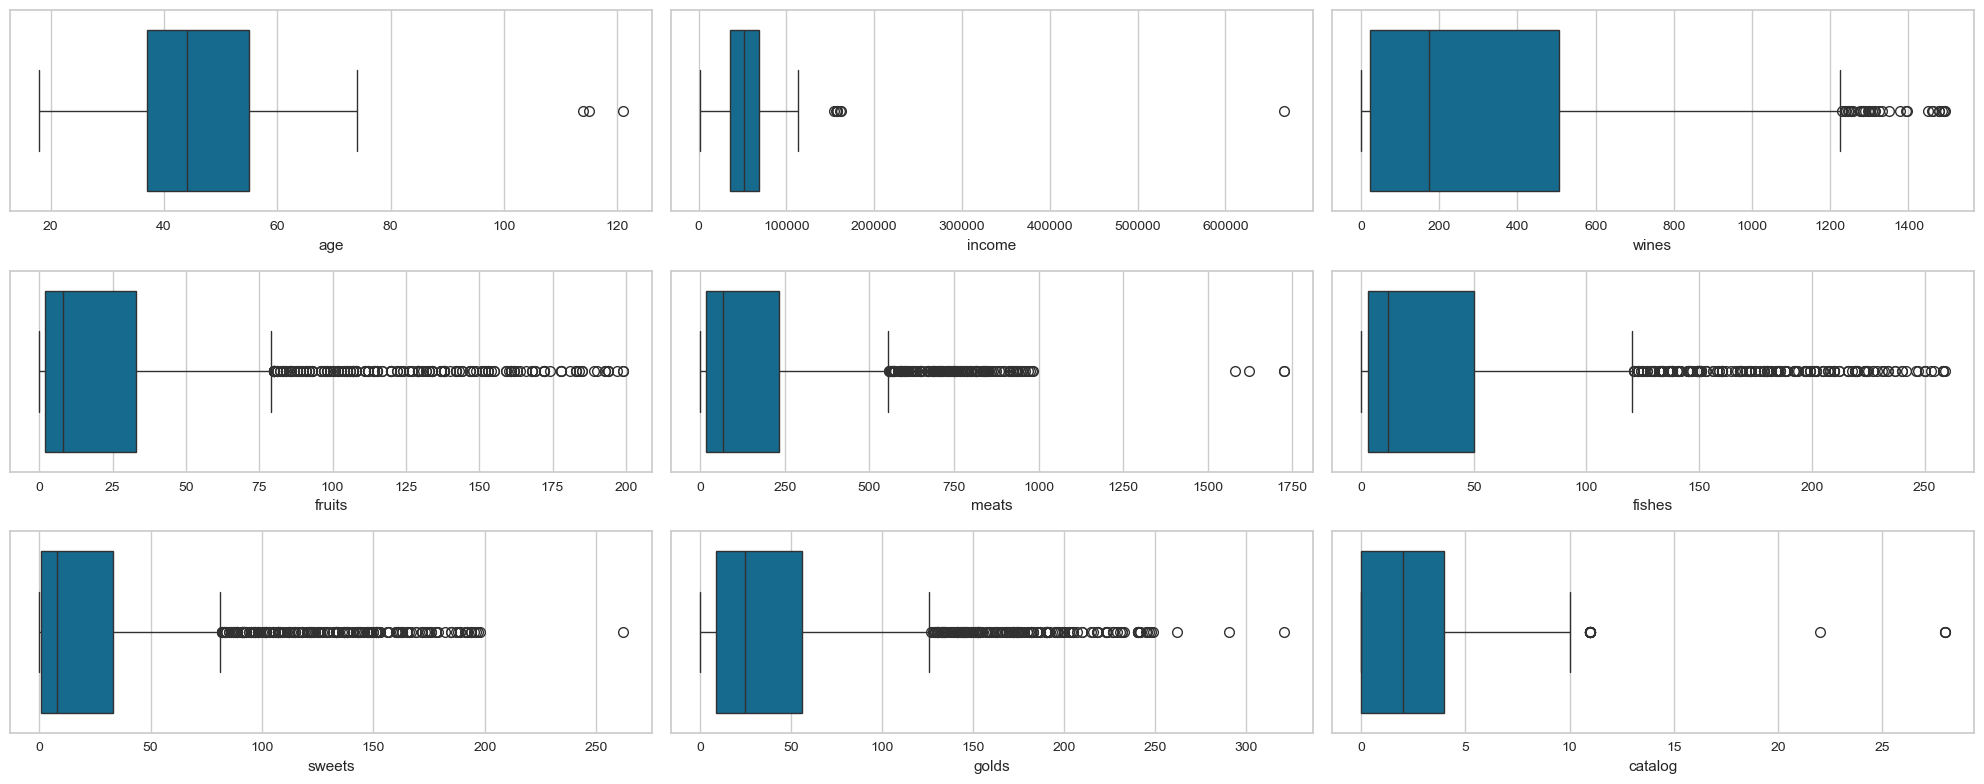

In [114]:
fig, ax=plt.subplots(3,3, figsize=(20,8))
sns.boxplot(data=df, x='age', ax=ax[0,0])
sns.boxplot(data=df, x='income', ax=ax[0,1])
sns.boxplot(data=df, x='wines', ax=ax[0,2])
sns.boxplot(data=df, x='fruits', ax=ax[1,0])
sns.boxplot(data=df, x='meats', ax=ax[1,1])
sns.boxplot(data=df, x='fishes', ax=ax[1,2])
sns.boxplot(data=df, x='sweets', ax=ax[2,0])
sns.boxplot(data=df, x='golds', ax=ax[2,1])
sns.boxplot(data=df, x='catalog', ax=ax[2,2])
plt.tight_layout();

In [115]:
# dropping outliers in the age and income features
df = df[(df["age"] < 100) & (df["income"] < 200000)]

In [116]:
df.shape

(2212, 35)

In [117]:
# dropping the target feature
target = df.response
df.drop("response", axis=1, inplace=True)

In [118]:
# dropping the processed or unnecessary features
df.drop(["marital_status", "dt_customer", "z_cost_contact", "z_revenue", "year_birth", "id", "kidhome", "teenhome"], axis=1, inplace=True)

In [119]:
# dropping the binary features
df.drop(["accepted_cmp_1", "accepted_cmp_2", "accepted_cmp_3", "accepted_cmp_4", "accepted_cmp_5", "complain"], axis=1, inplace=True)

In [120]:
df.columns

Index(['education', 'income', 'recency', 'wines', 'fruits', 'meats', 'fishes',
       'sweets', 'golds', 'deal', 'web', 'catalog', 'store', 'web_visits',
       'loyalty', 'age', 'living_with', 'children', 'family_size', 'spent'],
      dtype='object')

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
education,2212,1.45,0.54,0,1,1,2,2
income,2212,"51,958.81","21,527.28",1730,"35,233.50",51371,68487,162397
recency,2212,49.02,28.94,0,24,49,74,99
wines,2212,305.29,337.32,0,24,175.50,505,1493
fruits,2212,26.33,39.74,0,2,8,33,199
meats,2212,167.03,224.25,0,16,68,232.25,1725
fishes,2212,37.65,54.77,0,3,12,50,259
sweets,2212,27.05,41.09,0,1,8,33,262
golds,2212,43.93,51.71,0,9,24.50,56,321
deal,2212,2.32,1.92,0,1,2,3,15


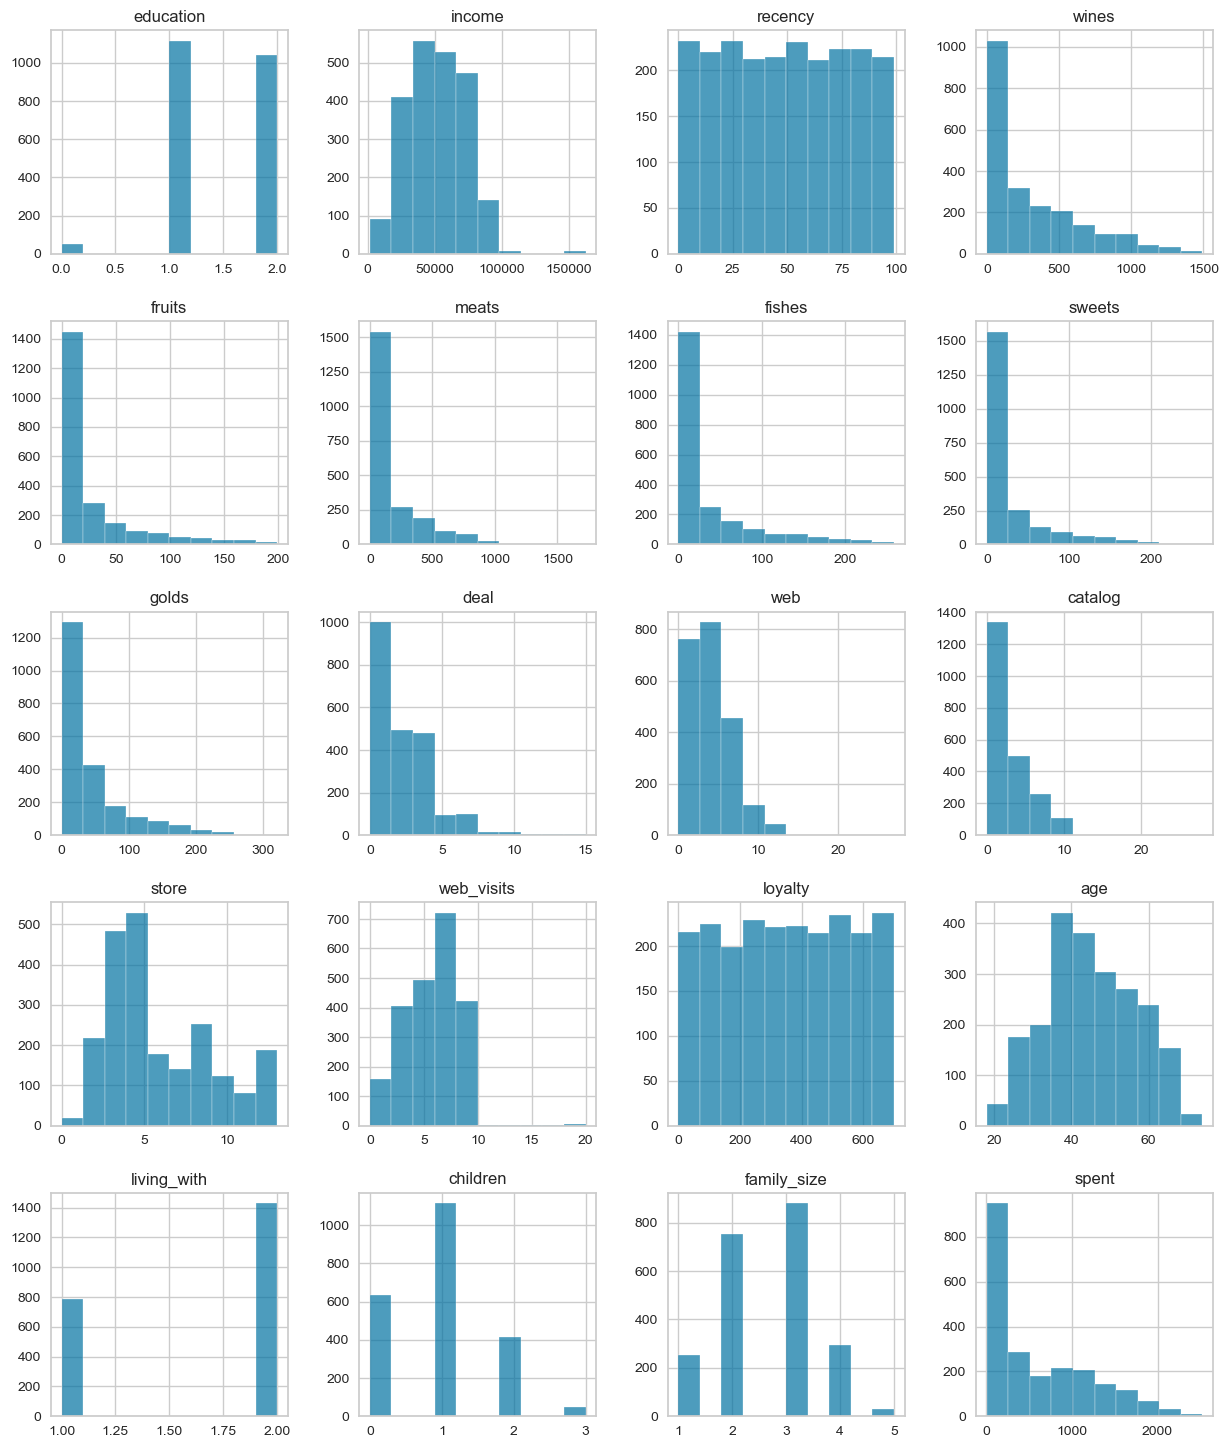

In [123]:
df.hist(bins=10, alpha=0.7)
plt.rc('figure', figsize=(15, 18))
#plt.figure(figsize = (30,20))
plt.show()

### Scaling

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
scaled_df = scaler.fit_transform(df)

In [126]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head(10)

,education,income,recency,wines,fruits,meats,fishes,sweets,golds,deal,web,catalog,store,web_visits,loyalty,age,living_with,children,family_size,spent
0,-0.82,0.29,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.56,0.69,1.53,1.02,-1.35,-1.26,-1.76,1.68
1,-0.82,-0.26,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-1.19,1.27,-1.35,1.40,0.45,-0.96
2,-0.82,0.91,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.21,0.33,0.74,-1.26,-0.65,0.28
3,-0.82,-1.18,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.56,0.28,-1.06,-1.29,0.74,0.07,0.45,-0.92
4,1.02,0.29,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.95,-1.03,0.74,0.07,0.45,-0.31
5,1.02,0.49,-1.14,0.64,0.39,-0.31,-0.69,0.36,-0.58,-0.17,0.70,0.45,1.29,0.28,-0.30,0.16,0.74,0.07,0.45,0.18
6,-0.82,0.17,-0.52,-0.21,0.97,-0.01,0.23,0.53,-0.33,0.87,1.06,0.11,0.37,0.28,1.18,-0.18,-1.35,0.07,-0.65,-0.03
7,1.02,-0.86,-0.59,-0.68,-0.41,-0.50,-0.63,-0.63,-0.40,-0.17,-0.03,-0.91,-0.56,1.10,0.31,-1.38,0.74,0.07,0.45,-0.73
8,1.02,-1.00,-1.04,-0.86,-0.66,-0.64,-0.63,-0.59,-0.81,-0.69,-0.40,-0.91,-1.17,1.52,0.17,-0.43,0.74,0.07,0.45,-0.93
9,1.02,-2.15,0.66,-0.82,-0.66,-0.72,-0.67,-0.63,-0.60,-0.69,-1.13,-0.91,-1.79,6.05,-1.21,1.62,0.74,1.40,1.55,-0.93


### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [127]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)
component_df = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_component"])
component_df

,first_component,second_component,third_component
0,4.58,0.03,2.67
1,-2.59,-0.74,-0.85
2,2.01,-0.32,-0.16
3,-2.59,-1.06,-0.30
4,-0.29,0.70,-0.82
...,...,...,...
2207,2.59,1.58,0.79
2208,-2.02,4.31,-2.42
2209,2.01,-1.74,0.92
2210,1.72,0.87,-1.99


In [128]:
pca.components_

array([[ 0.01004376,  0.3081376 ,  0.00553806,  0.28344941,  0.2587645 ,
         0.30598474,  0.26878082,  0.25808633,  0.20952037, -0.05849508,
         0.19546616,  0.30175139,  0.26864646, -0.23499322,  0.03917005,
         0.04532259, -0.0269256 , -0.22986931, -0.20431945,  0.34966387],
       [ 0.11395889,  0.08720233,  0.01928535,  0.20475127, -0.04783367,
        -0.03688507, -0.05277171, -0.03105728,  0.12780495,  0.48834698,
         0.34723659,  0.06236628,  0.17791632,  0.21090015,  0.2369133 ,
         0.20411378,  0.22355697,  0.36963798,  0.42372119,  0.10180085],
       [-0.28580364, -0.23024495,  0.00378534,  0.00308097,  0.03452761,
        -0.04233265,  0.02903675,  0.02570056,  0.19262578,  0.20107108,
         0.16613569, -0.0515432 , -0.027789  ,  0.39589803,  0.51072357,
        -0.26131197, -0.38490454, -0.13597711, -0.31566511,  0.00916963]])

In [129]:
pca.explained_variance_

array([7.32337539, 2.18108782, 1.50271434])

In [130]:
pca.explained_variance_ratio_

array([0.36600323, 0.10900509, 0.07510175])

In [131]:
pca.explained_variance_ratio_.cumsum()

array([0.36600323, 0.47500832, 0.55011007])

Text(0, 0.5, 'Variance Ratio')

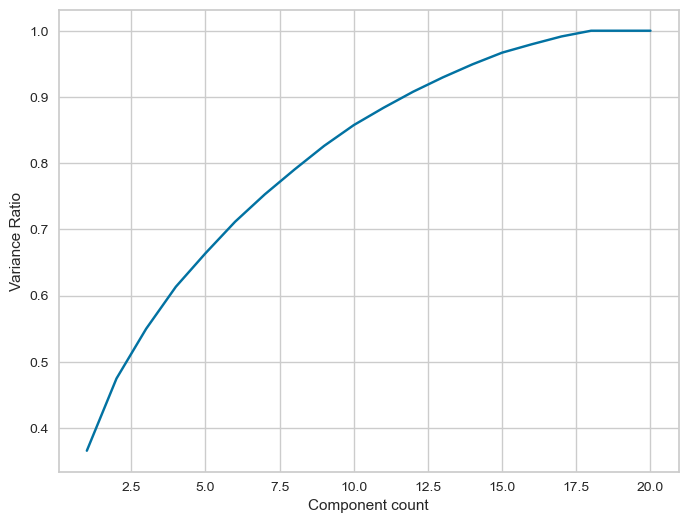

In [132]:
x = range(1,21)
pca = PCA().fit(scaled_df)
plt.rc('figure', figsize=(8, 6))
plt.plot(x, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

In [133]:
pca = PCA(n_components=20).fit(scaled_df)

In [134]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [135]:
df_ev = pd.DataFrame(my_dict, index=range(1,21))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,7.32,0.37,0.37
2,2.18,0.11,0.48
3,1.50,0.08,0.55
4,1.27,0.06,0.61
5,1.01,0.05,0.66
6,0.95,0.05,0.71
7,0.83,0.04,0.75
8,0.75,0.04,0.79
9,0.72,0.04,0.83
10,0.63,0.03,0.86


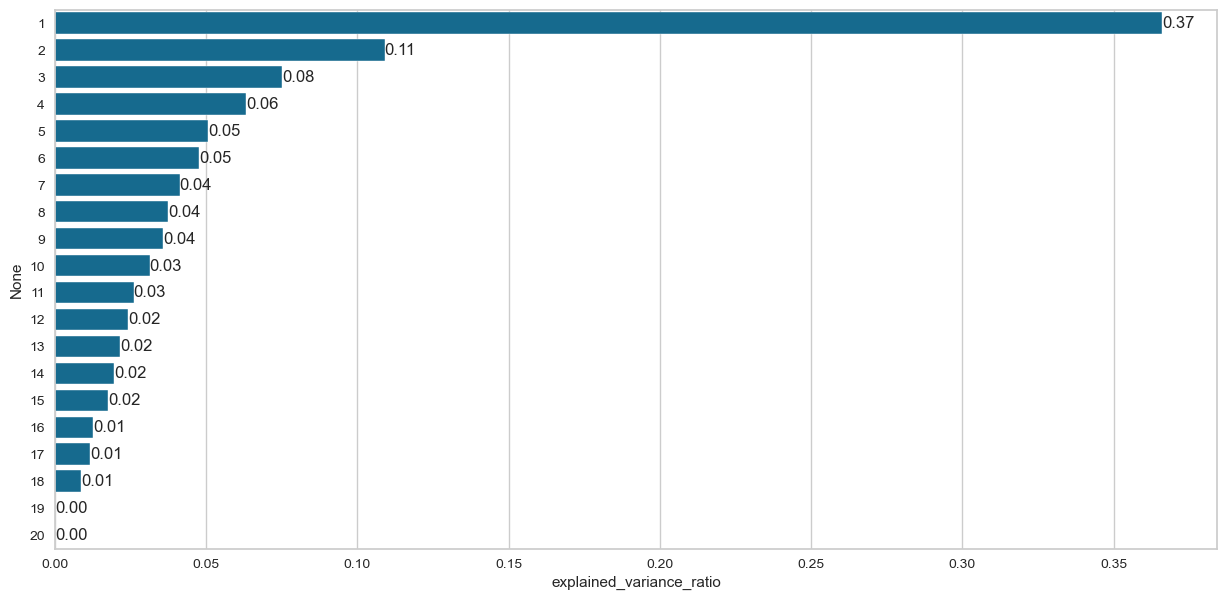

In [136]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

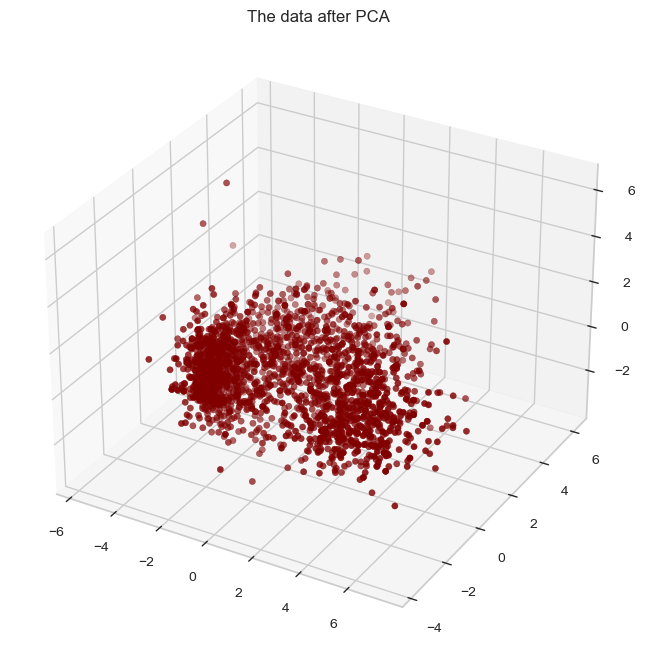

In [137]:
#  The data after PCA
x =component_df["first_component"]
y =component_df["second_component"]
z =component_df["third_component"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("The data after PCA")
plt.show()

In [138]:
color = np.argmax(component_df, axis=1)
color

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [139]:
# 3D scatter plot of the components
fig = px.scatter_3d(component_df, x="first_component", y="second_component", z="third_component", color=color)
fig.update_layout(scene=dict(xaxis_title="1st", yaxis_title="2nd", zaxis_title="3rd"))
fig.show()

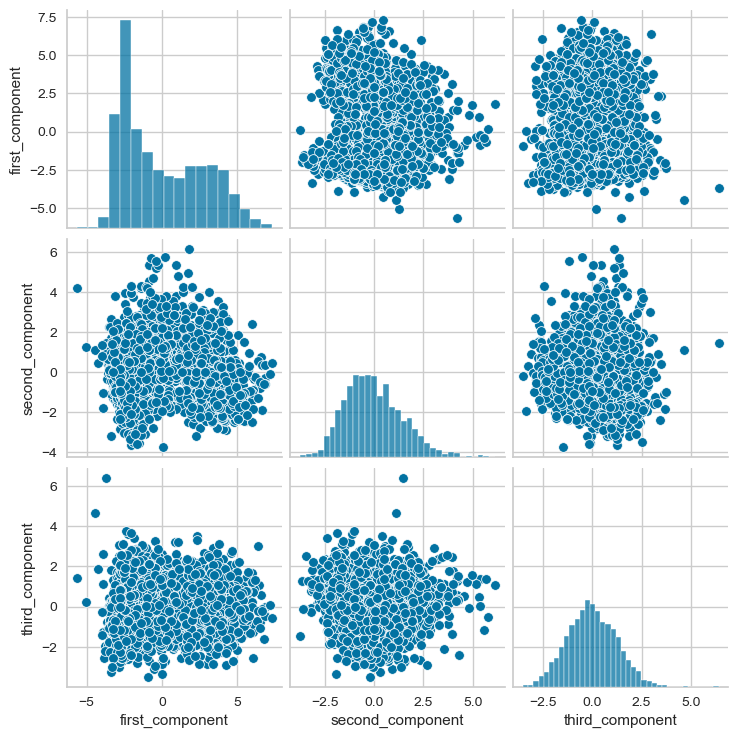

In [140]:
# there is no strong correlation between components.
sns.pairplot(component_df)

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clustering

### Create a new dataset with numeric features

In [142]:
df.head(5)

,education,income,recency,wines,fruits,meats,fishes,sweets,golds,deal,web,catalog,store,web_visits,loyalty,age,living_with,children,family_size,spent
0,1,58138,58,635,88,546,172,88,88,3,8,10,4,7,663,57,1,0,1,1617
1,1,46344,38,11,1,6,2,1,6,2,1,1,2,5,113,60,1,2,3,27
2,1,71613,26,426,49,127,111,21,42,1,8,2,10,4,312,49,2,0,2,776
3,1,26646,26,11,4,20,10,3,5,2,2,0,4,6,139,30,2,1,3,53
4,2,58293,94,173,43,118,46,27,15,5,5,3,6,5,161,33,2,1,3,422


In [143]:
# we use robustscaler because it is more stable with outliers. We know that our data has outliers
scaler = RobustScaler().set_output(transform="pandas")

In [144]:
cluster_df = scaler.fit_transform(df)

In [ ]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [145]:
# Our data is suitable for clustering
hopkins(cluster_df, 1)

0.8394335158848308

#### Determine optimal number of clusters

### inertia

In [ ]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

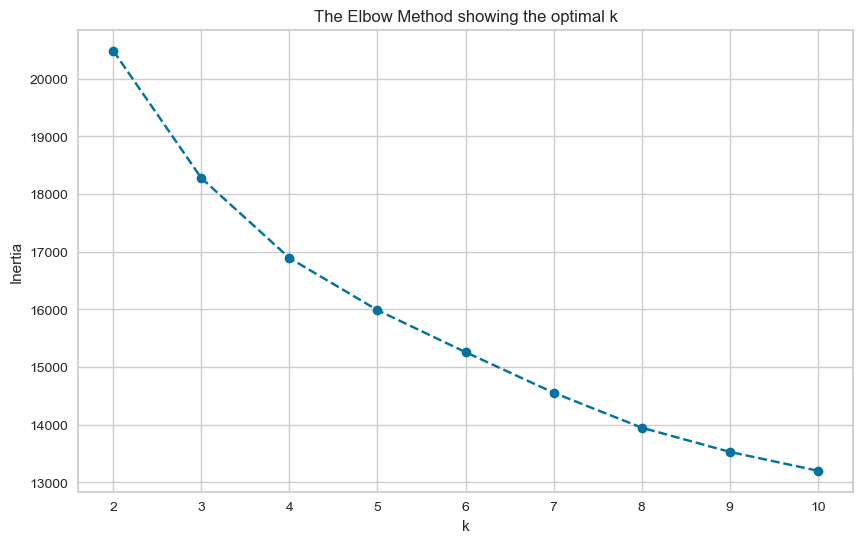

In [146]:
# When we check inertia 3 or 4 seems to be good
# Inertia means the variance within the clusters
elbow_vis(cluster_df, inertia=True)

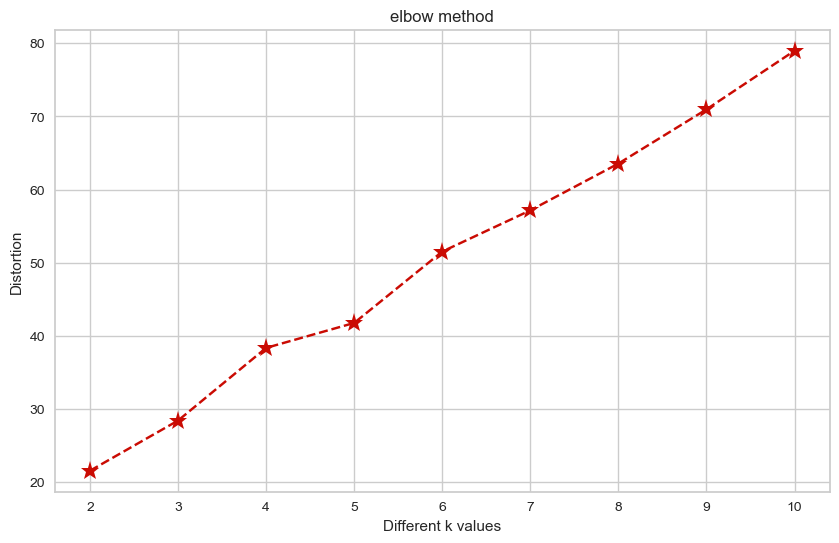

In [147]:
# According to the Distertion metric with 4 clusters the quality decreases. So 3 is the best option
elbow_vis(cluster_df, inertia=False)

In [148]:
# Now the silhouette score. 2 clusters seem good but inertia at this level is maximum. So we cannot select 2.
# There is not much difference between 3 and 4 
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3292431310429696
For n_clusters=3, the silhouette score is 0.21036087270264828
For n_clusters=4, the silhouette score is 0.11992193346410508
For n_clusters=5, the silhouette score is 0.09659405403102102
For n_clusters=6, the silhouette score is 0.10385463596635851
For n_clusters=7, the silhouette score is 0.09518265981529955
For n_clusters=8, the silhouette score is 0.09436197421700634


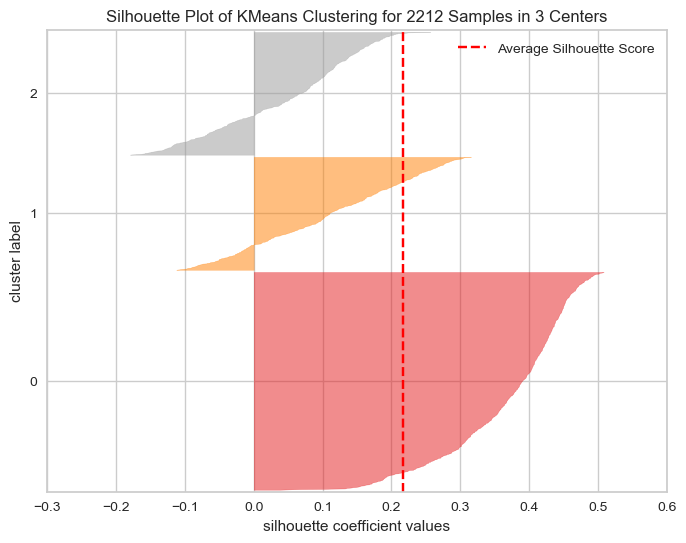

In [170]:
# We have negative silhouette values. This means that observations that are not similar are in the same cluster. We should increase the number of clusters
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(cluster_df) 
visualizer.poof();

In [171]:
model.n_clusters

3

#### Apply K Means

In [176]:
# we decided to have 3 clusters according to scores and graphs
kmeans = KMeans(n_clusters=3, random_state=42)

In [177]:
kmeans.fit_predict(cluster_df)

array([1, 0, 2, ..., 2, 2, 0])

#### Visualizing and Labeling All the Clusters

In [180]:
# 3D scatter plot of the clusters
fig = px.scatter_3d(component_df, x="first_component", y="second_component", z="third_component", color=kmeans.labels_)
fig.update_layout(scene=dict(xaxis_title="1st", yaxis_title="2nd", zaxis_title="3rd"))
fig.show()

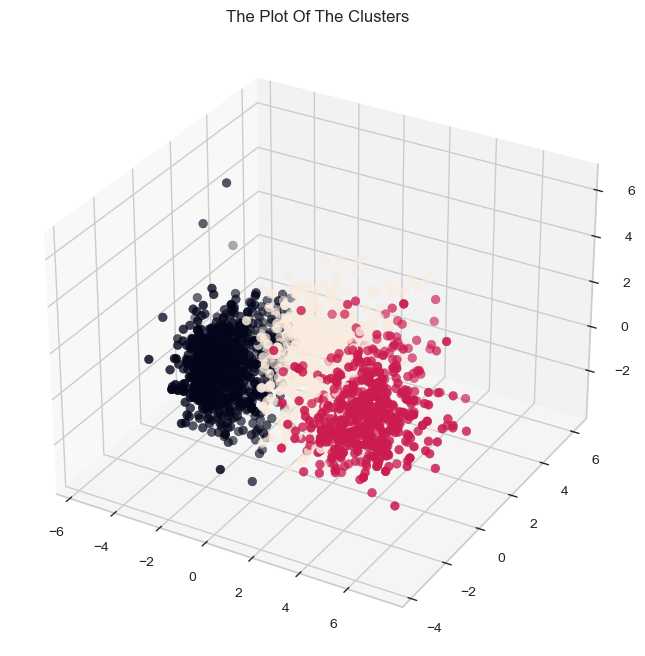

In [182]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans.labels_, marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

<Axes: xlabel='first_component', ylabel='second_component'>

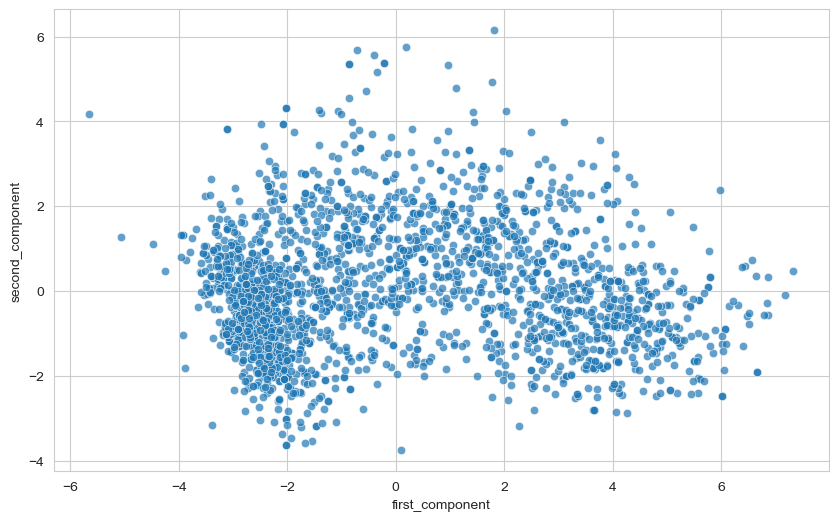

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=component_df.first_component,
                y=component_df.second_component,
                alpha=0.7)

In [183]:
df["kmeans_labels"] = kmeans.labels_

### Clustering based on selected features

#### Select features from existing data

In [184]:
df

,education,income,recency,wines,fruits,meats,fishes,sweets,golds,deal,...,catalog,store,web_visits,loyalty,age,living_with,children,family_size,spent,kmeans_labels
0,1,58138,58,635,88,546,172,88,88,3,...,10,4,7,663,57,1,0,1,1617,1
1,1,46344,38,11,1,6,2,1,6,2,...,1,2,5,113,60,1,2,3,27,0
2,1,71613,26,426,49,127,111,21,42,1,...,2,10,4,312,49,2,0,2,776,2
3,1,26646,26,11,4,20,10,3,5,2,...,0,4,6,139,30,2,1,3,53,0
4,2,58293,94,173,43,118,46,27,15,5,...,3,6,5,161,33,2,1,3,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223,46,709,43,182,42,118,247,2,...,3,4,5,381,47,2,1,3,1341,1
2236,2,64014,56,406,0,30,0,0,8,7,...,2,5,7,19,68,2,3,5,444,2
2237,1,56981,91,908,48,217,32,12,24,1,...,3,13,6,155,33,1,0,1,1241,2
2238,2,69245,8,428,30,214,80,30,61,2,...,5,10,3,156,58,2,1,3,843,2


In [185]:
clus_pred = df.groupby("kmeans_labels").mean()
clus_pred

,education,income,recency,wines,fruits,meats,fishes,sweets,golds,deal,web,catalog,store,web_visits,loyalty,age,living_with,children,family_size,spent
kmeans_labels,,,,,,,,,,,,,,,,,,,,
0,1.42,"35,671.79",49.27,50.75,4.65,23.73,6.43,4.69,14.22,2.08,2.22,0.56,3.32,6.43,319.77,42.96,1.66,1.25,2.91,104.47
1,1.41,"75,100.07",49.92,580.54,73.84,454.00,106.42,76.70,80.97,1.41,5.42,5.89,8.48,3.03,370.03,45.65,1.60,0.25,1.85,"1,372.46"
2,1.53,"59,548.09",47.75,503.38,21.06,157.12,29.73,21.01,62.52,3.59,6.18,3.45,7.76,5.47,398.88,48.33,1.67,1.05,2.71,794.83


In [186]:
# We scale the data with MinMaxScaler to adjust the values within a range of 0 to 1
clus_pred_scaled = MinMaxScaler().set_output(transform="pandas").fit_transform(clus_pred)
clus_pred_scaled

,education,income,recency,wines,fruits,meats,fishes,sweets,golds,deal,web,catalog,store,web_visits,loyalty,age,living_with,children,family_size,spent
kmeans_labels,,,,,,,,,,,,,,,,,,,,
0,0.01,0,0.70,0,0,0,0,0,0,0.31,0,0,0,1,0,0,0.90,1,1.00,0
1,0,1,1,1,1,1,1,1.00,1.00,0,0.81,1.00,1,0,0.64,0.50,0,0,0,1.00
2,1,0.61,0,0.85,0.24,0.31,0.23,0.23,0.72,1.00,1,0.54,0.86,0.72,1,1.00,1,0.80,0.82,0.54


In [187]:
clus_pred_scaled.T

kmeans_labels,0,1,2
education,0.01,0,1
income,0,1,0.61
recency,0.70,1,0
wines,0,1,0.85
fruits,0,1,0.24
meats,0,1,0.31
fishes,0,1,0.23
sweets,0,1.00,0.23
golds,0,1.00,0.72
deal,0.31,0,1.00


In [188]:
# except kmeans_labels
df.columns[:-1]

Index(['education', 'income', 'recency', 'wines', 'fruits', 'meats', 'fishes',
       'sweets', 'golds', 'deal', 'web', 'catalog', 'store', 'web_visits',
       'loyalty', 'age', 'living_with', 'children', 'family_size', 'spent'],
      dtype='object')

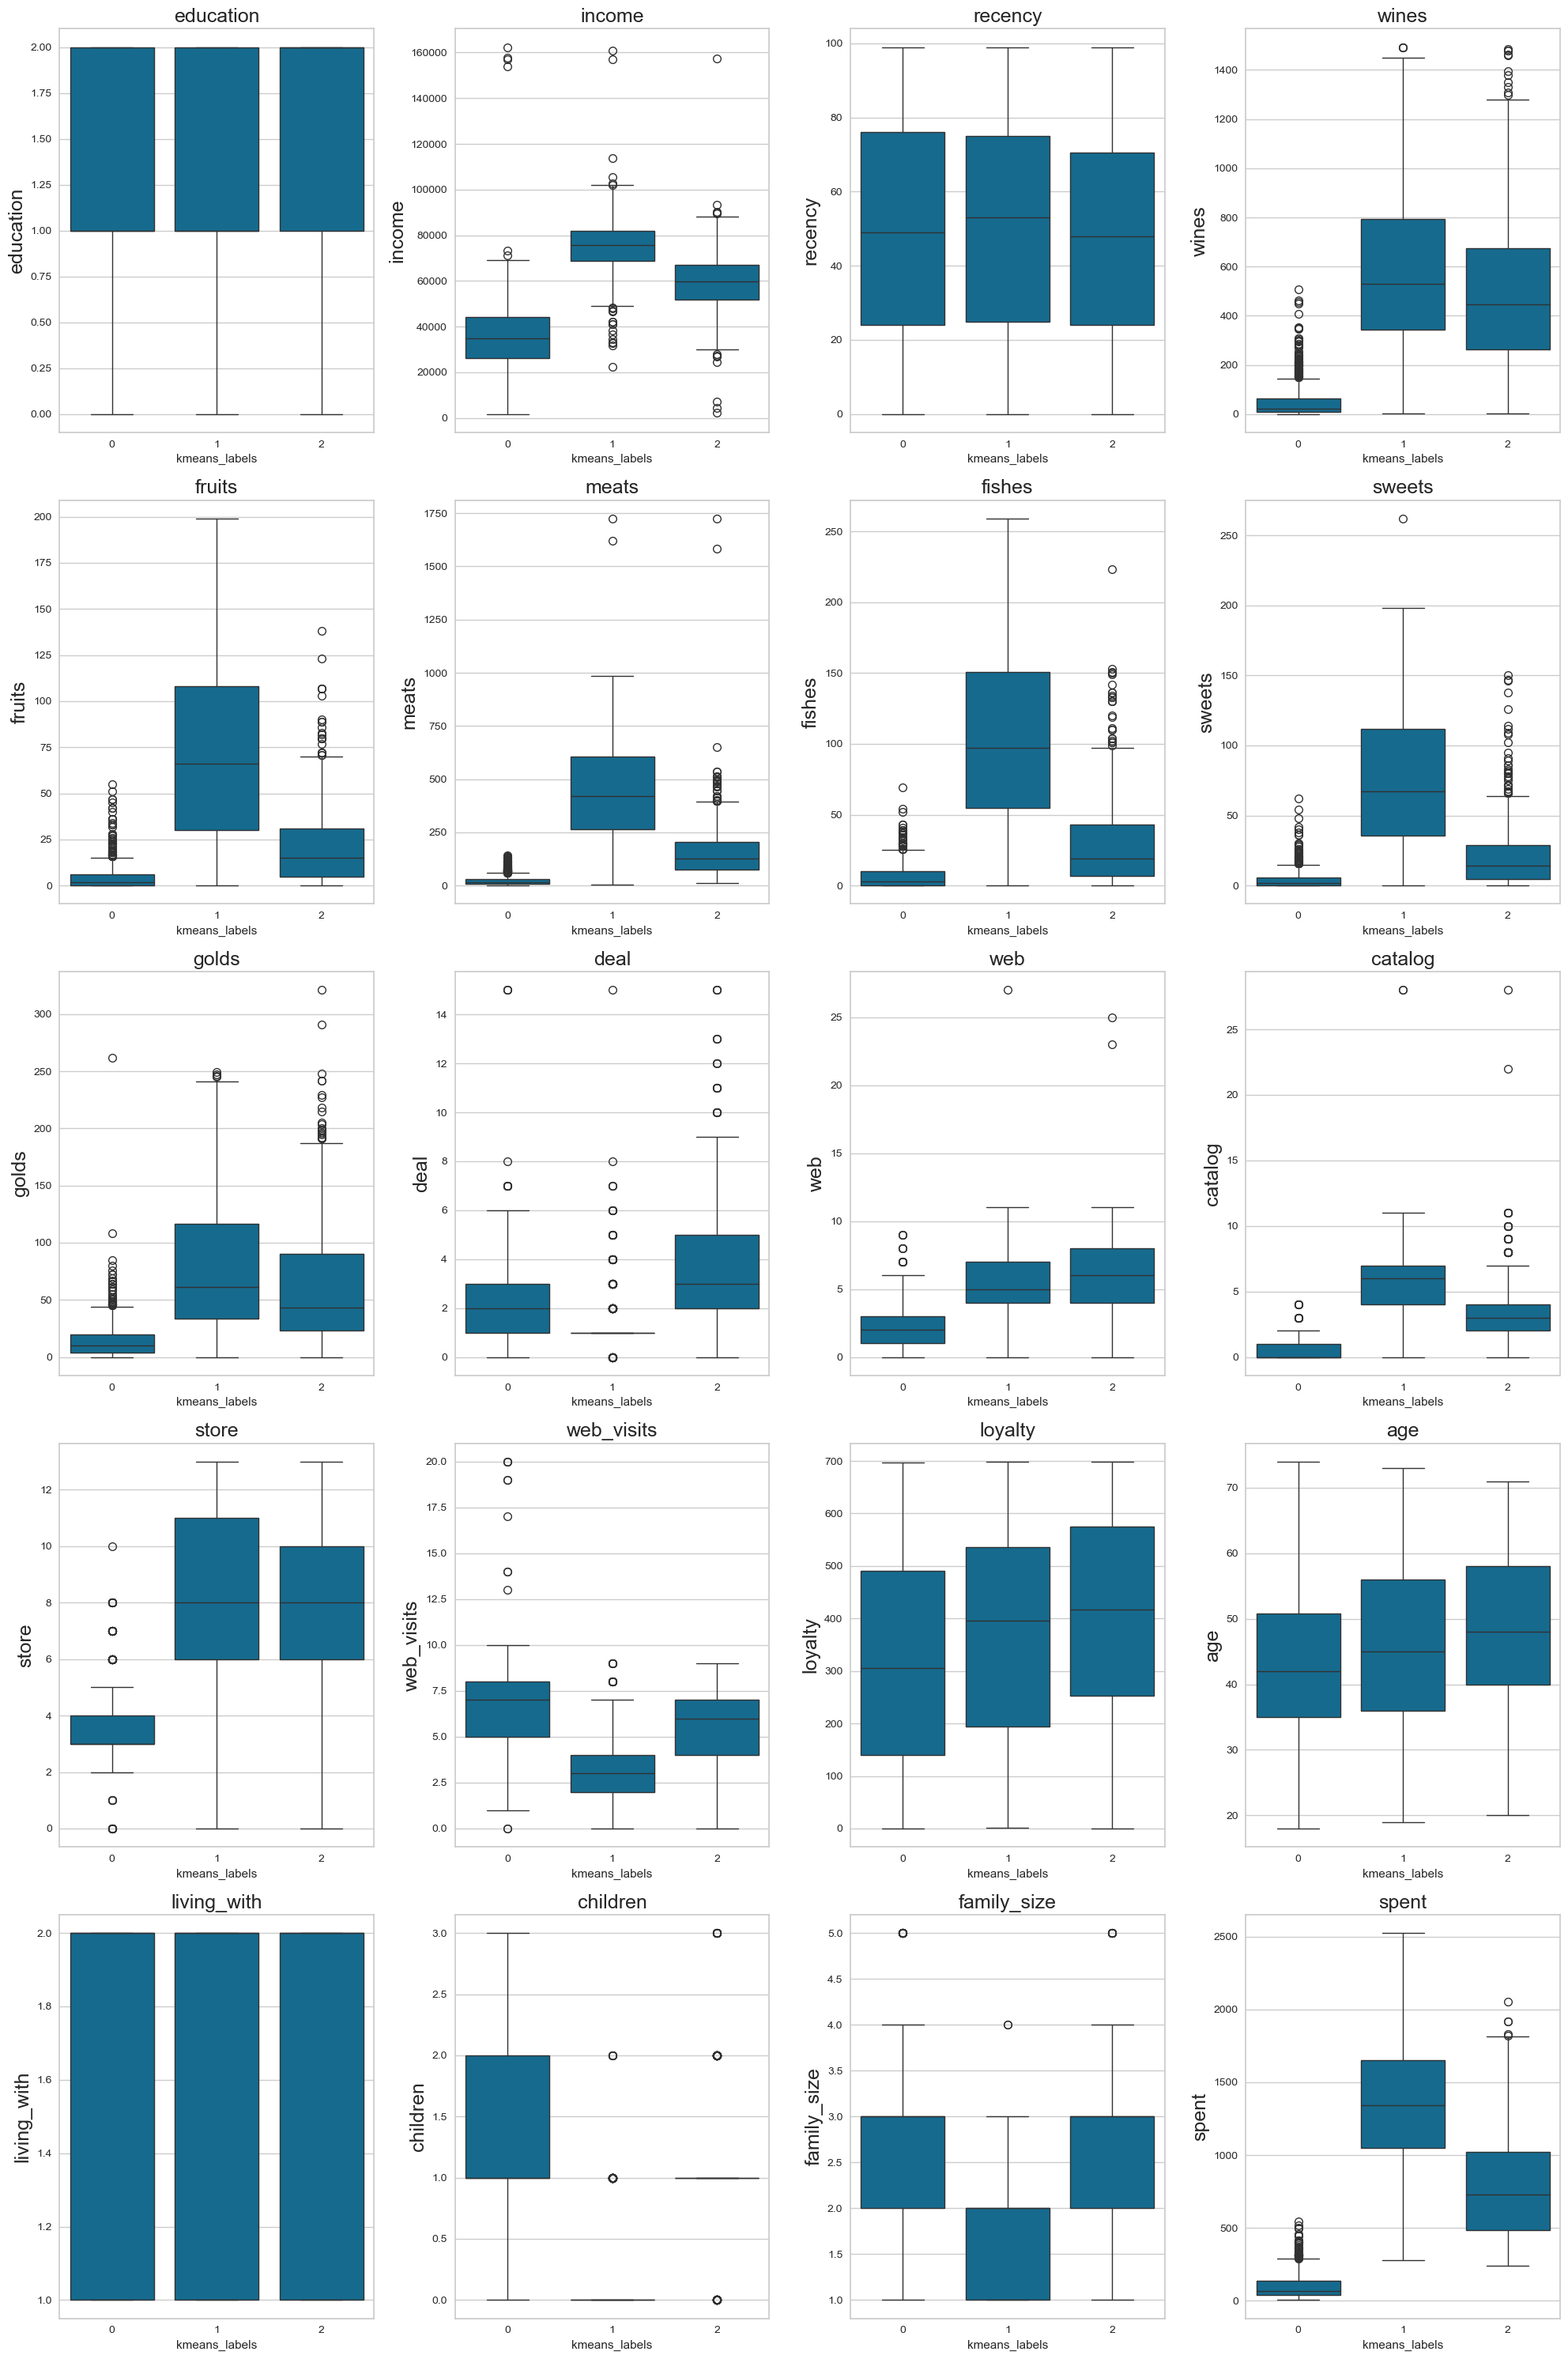

In [190]:
fig, axes = plt.subplots(5, 4, figsize=(20, 30))
axes_flat = axes.flatten() 

for i, feature in enumerate(df.columns[:-1]):
    ax = axes_flat[i]
    sns.boxplot(y=feature, x="kmeans_labels", data=df, ax=ax)
    
    ax.set_ylabel(feature, fontsize=18)
    ax.set_title(feature, fontsize=18)   

plt.tight_layout() 
plt.show()

In [194]:
selected_features = [
    "income",
    "fruits",
    "fishes",
    'sweets',
    "catalog",
    "family_size",
    "spent"
]
# Create a new DataFrame with the selected features
df_selected = df[selected_features]

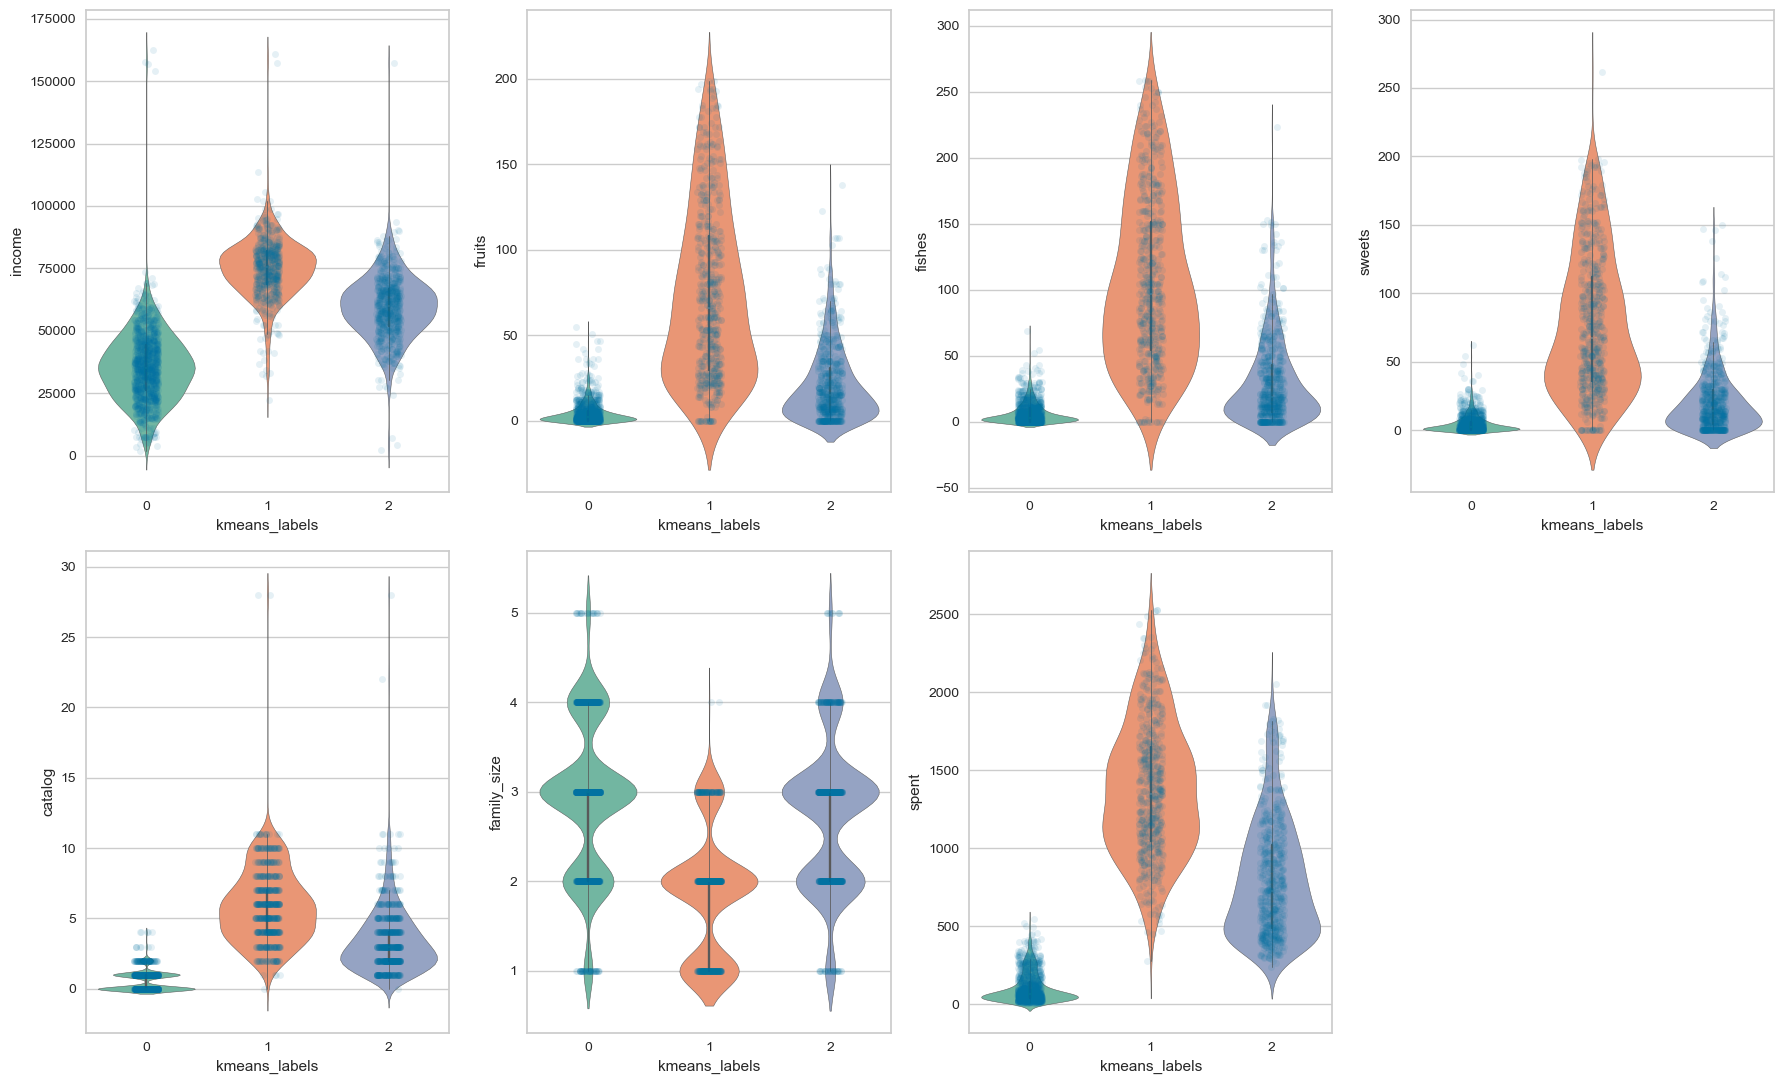

In [207]:
plt.figure(figsize=(18, 11))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 4, i +1 )
    sns.stripplot(
        y=feature,
        x=df["kmeans_labels"],
        data=df_selected,
        jitter=True,
        edgecolor="gray",
        alpha=0.1,
    )
    sns.violinplot(y=feature, x=df["kmeans_labels"], data=df_selected, palette="Set2")

plt.tight_layout()

In [208]:
df_selected.income.describe()

count        2212
mean    51,958.81
std     21,527.28
min          1730
25%     35,233.50
50%         51371
75%         68487
max        162397
Name: income, dtype: float64

In [209]:
def income_binner(x):
    if x < 35233:
        return 0
    elif x < 68487:
        return 1
    else:
        return 2


df_selected["income"] = df_selected["income"].apply(income_binner)

#### Determine optimal number of clusters for selected features

In [210]:
df_selected = scaler.fit_transform(df_selected)

In [211]:
# The hopkins score is better
result = []
for _ in range(10):
    result.append(hopkins(df_selected, 0.05))

np.mean(result)

0.8862076948839462

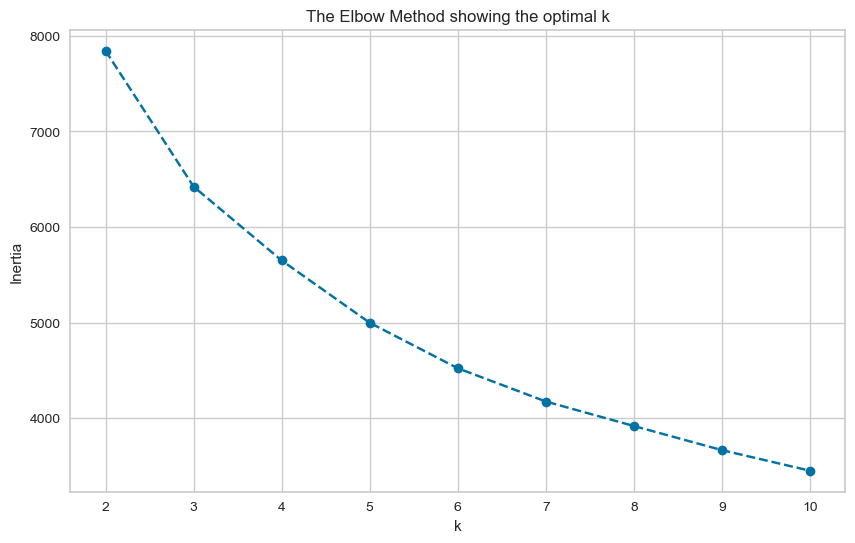

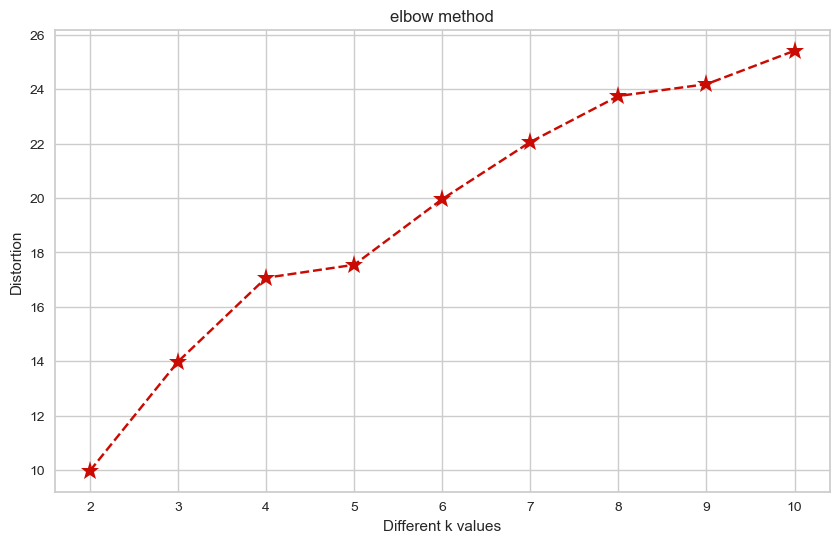

In [212]:
elbow_vis(df_selected)
elbow_vis(df_selected, inertia=False)

In [213]:
# with selected features we have better silhouette scores
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_selected)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5119696594663793
For n_clusters=3, the silhouette score is 0.4191090463080178
For n_clusters=4, the silhouette score is 0.41472812185017727
For n_clusters=5, the silhouette score is 0.28084335596338506
For n_clusters=6, the silhouette score is 0.2851532002559016
For n_clusters=7, the silhouette score is 0.2895626806593075
For n_clusters=8, the silhouette score is 0.29242379298995896


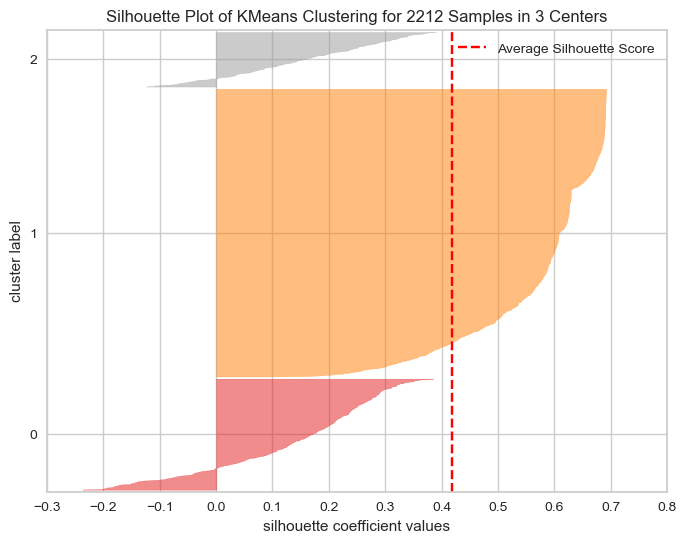

In [214]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_selected)  # Fit the data to the visualizer
visualizer.poof();

#### Building the model based on the optimal number of clusters with selected features

In [215]:
final_model = KMeans(n_clusters=3, random_state=42)
final_model.fit_predict(df_selected)

array([2, 1, 0, ..., 0, 0, 1])

In [218]:
def plot(col=df.columns, hue=df.select_dtypes(include="O").columns):
    sns.boxplot(y=col, x=final_model.labels_, hue=final_model.labels_, data=df, palette="deep")
    plt.legend(bbox_to_anchor=(1, 1))
interact(plot);

interactive(children=(Dropdown(description='col', options=('education', 'income', 'recency', 'wines', 'fruits'…

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

In [220]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [221]:
def dendogramer(method=["ward", "complete", "average", "single"]):
    link = linkage(y=df_selected, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(
        link, truncate_mode="lastp", p=10,  leaf_font_size=10
    )

interact(dendogramer);

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

### silhouette_score

In [222]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_selected)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.48519348839329907
For n_clusters=3, the silhouette score is 0.4469763591433237
For n_clusters=4, the silhouette score is 0.42005155629109026
For n_clusters=5, the silhouette score is 0.22912793394355052
For n_clusters=6, the silhouette score is 0.2305900742138221
For n_clusters=7, the silhouette score is 0.24901548491187878
For n_clusters=8, the silhouette score is 0.2578520320713991
For n_clusters=9, the silhouette score is 0.25955183825864747
For n_clusters=10, the silhouette score is 0.2503429847839194


### Clustering based on selected features

In [223]:
df_selected

,income,fruits,fishes,sweets,catalog,family_size,spent
0,0,2.58,3.40,2.50,2,-2,1.25
1,0,-0.23,-0.21,-0.22,-0.25,0,-0.38
2,0.80,1.32,2.11,0.41,0,-1,0.39
3,-0.80,-0.13,-0.04,-0.16,-0.50,0,-0.35
4,0,1.13,0.72,0.59,0.25,0,0.03
...,...,...,...,...,...,...,...
2235,0,1.13,0.64,3.44,0.25,0,0.96
2236,0,-0.26,-0.26,-0.25,0,2,0.05
2237,0,1.29,0.43,0.12,0.25,-2,0.86
2238,0.80,0.71,1.45,0.69,0.75,0,0.46


In [227]:
Agglo = AgglomerativeClustering(
    n_clusters=3,
    metric="euclidean", 
    linkage="ward",
)  
y_agglo = Agglo.fit_predict(df_selected)

In [228]:
df["agglo_labels"] = y_agglo

In [229]:
pd.crosstab(df["kmeans_labels"], df["agglo_labels"])

agglo_labels,0,1,2
kmeans_labels,,,
0,0,1062,0
1,327,10,214
2,110,466,23


In [235]:
# we arrange the colors according to the model cluster numbering
def plot(col1=df.columns, col2=df.columns):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    sns.scatterplot(
        data=df, 
        x=col1, 
        y=col2, 
        hue=final_model.labels_, 
        palette=['green','orange', 'blue'], 
        ax=ax[0],
        alpha=0.5

    )
    ax[0].set_title("K-means")
    sns.scatterplot(
        data=df, 
        x=col1, 
        y=col2, 
        hue=Agglo.labels_, 
        palette=['green', 'orange', 'blue'], 
        ax=ax[1],
        alpha=0.5
    )
    ax[1].set_title("Aglomerative")
    plt.show()
interact(plot);

interactive(children=(Dropdown(description='col1', options=('education', 'income', 'recency', 'wines', 'fruits…

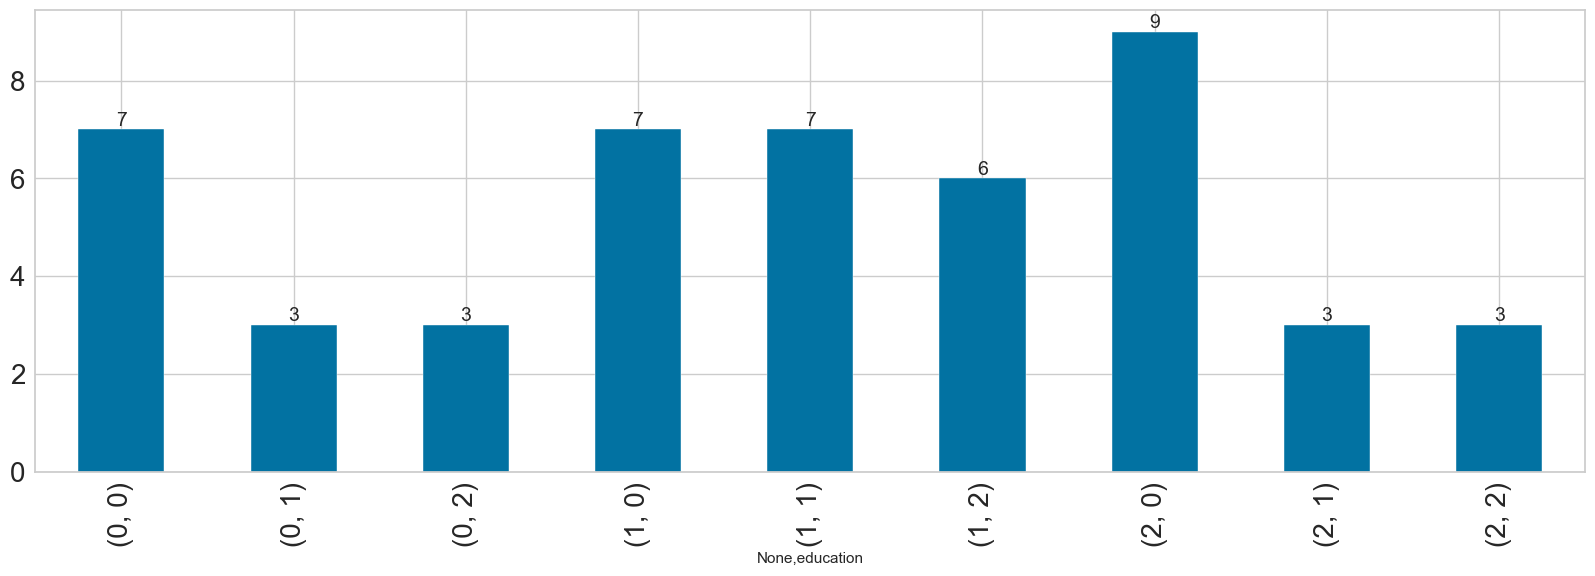

In [238]:
ax=(df
    .groupby([Agglo.labels_, "education"])["web_visits"]
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20))
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

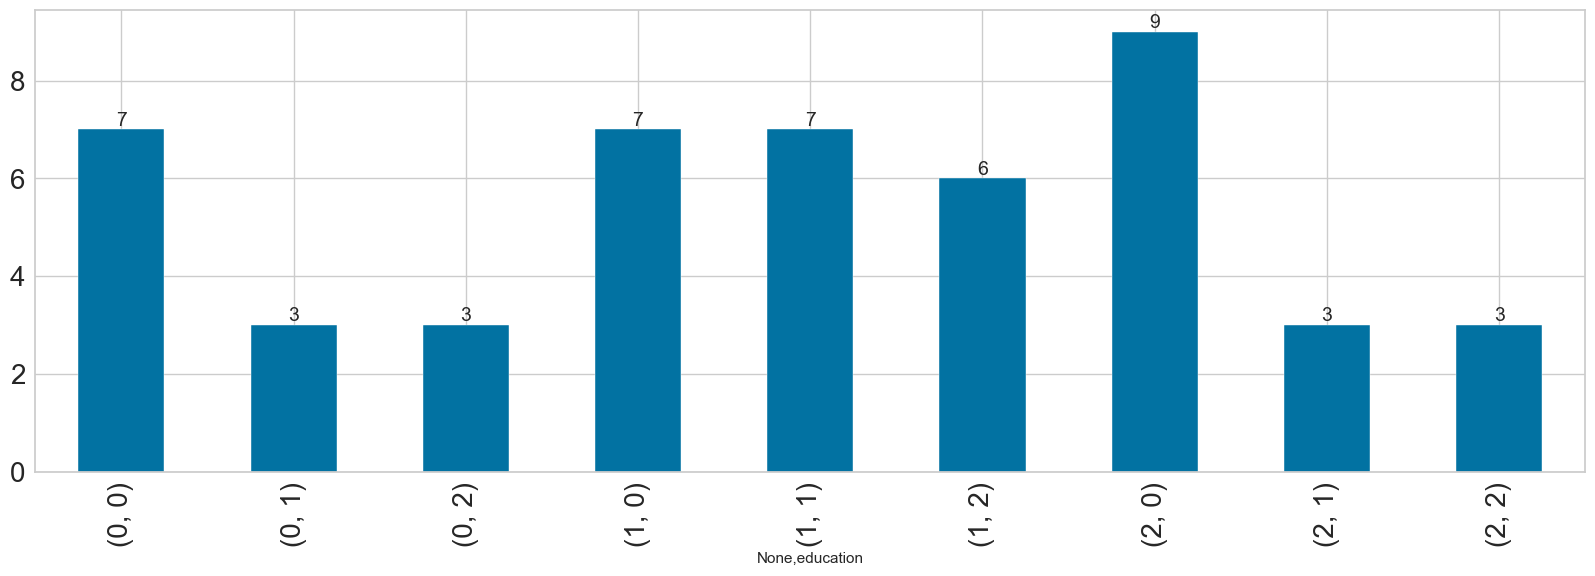

In [247]:

ax=(df
    .groupby([final_model.labels_, "education"])["web_visits"]
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20))
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

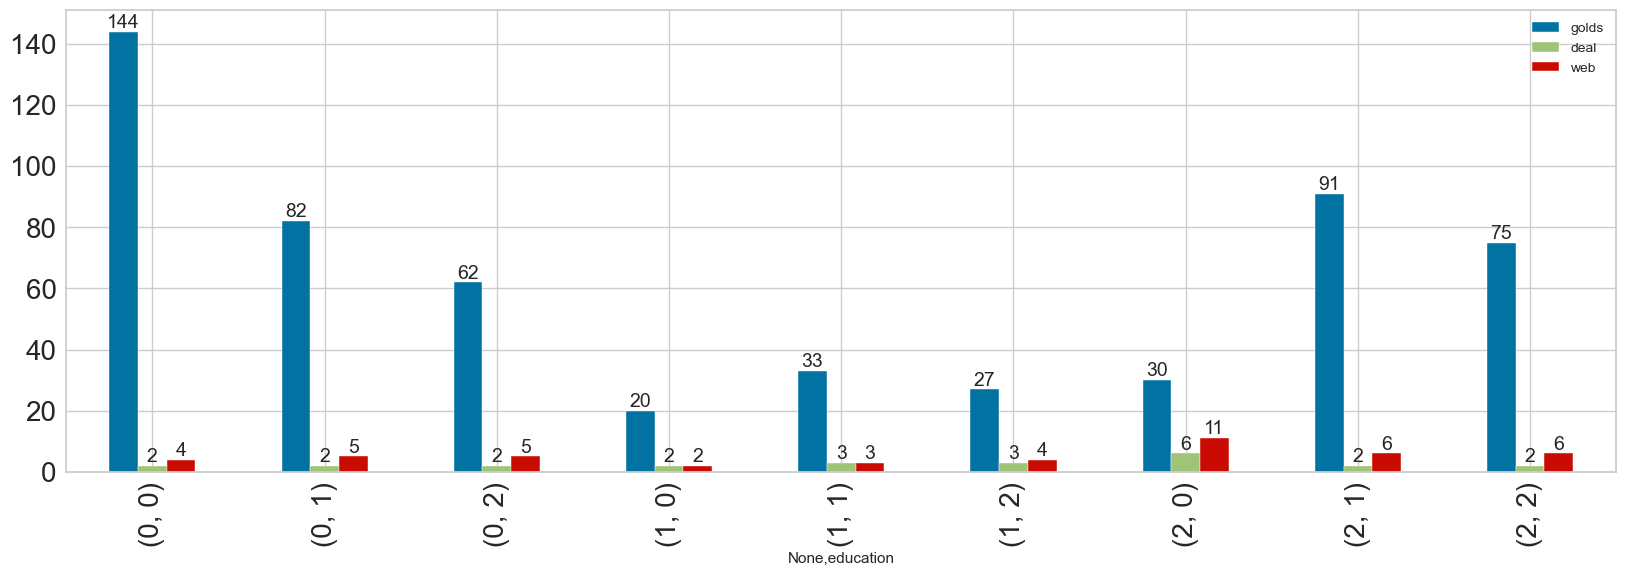

In [239]:
ax=(df[["education"]]
    .join(df.iloc[:, 8:11])
    .groupby([Agglo.labels_, "education"])
    .mean()
    .round()
    .plot(kind="bar", figsize=(20, 6), fontsize=20))
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

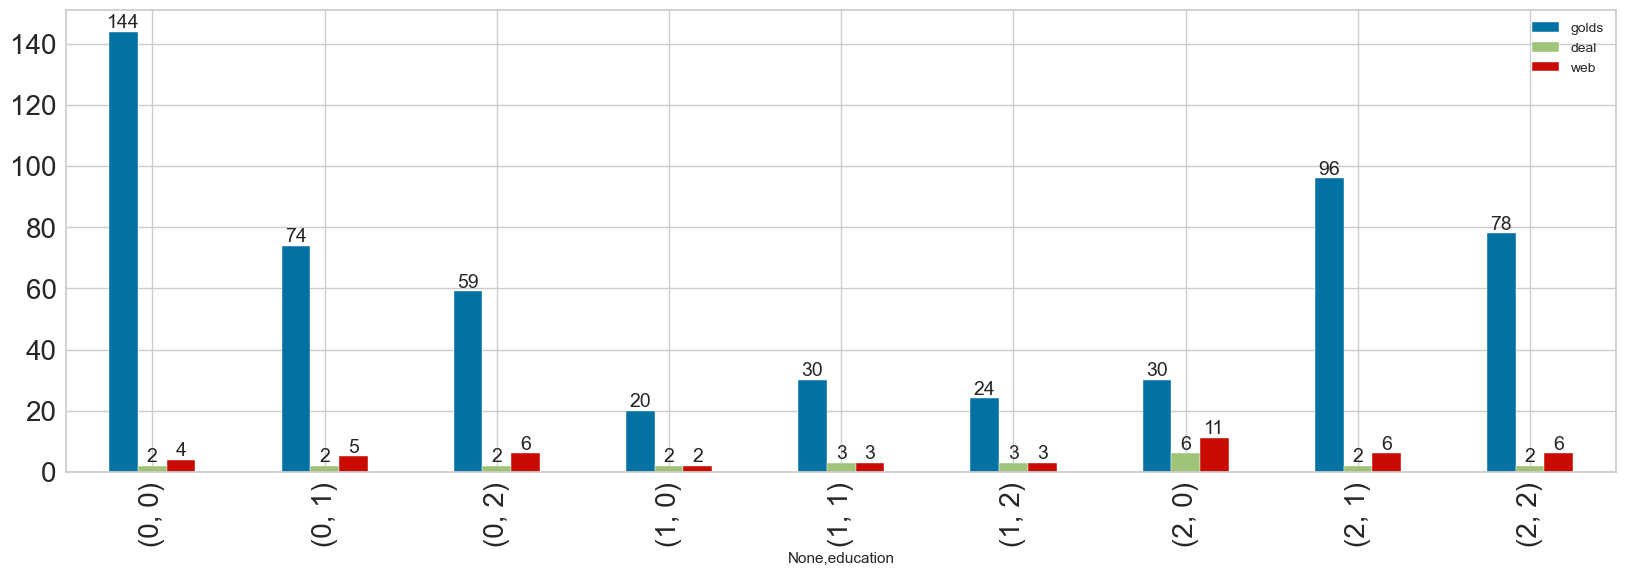

In [248]:
ax=(df[["education"]]
    .join(df.iloc[:, 8:11])
    .groupby([final_model.labels_, "education"])
    .mean()
    .round()
    .plot(kind="bar", figsize=(20, 6), fontsize=20))
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

## Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___